In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [ ]:
#Reading the dataset
data1=pd.read_csv("/content/Healthcare-Diabetes.csv")
#finding the dimensions
print(data1.shape)
#column names
data1.columns
#to find the datatypes of  each column
data1.dtypes
data1.head()

(2768, 10)


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


# Converting Outcome has categorical

In [ ]:
#coverting ouytome to categorical
data1['Outcome']=pd.Categorical(data1['Outcome'])

# Checking for missing values

In [ ]:
#checking for missing numbers
data1.isnull().sum()
cols=list(data1)
(data1[cols[2:9]]==0).sum()
#replacing 0 with Nan
data1[cols[2:9]]=data1[cols[2:9]].replace(0,np.nan)
data1.isnull().sum()


Id                             0
Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

# More number of missing data in insulin column so better to remove it.
If we replace them with median value there will be false interpretation and baising.

In [ ]:
data1=data1.drop('Insulin',axis=1)

In [ ]:
#removing the null values
data1.dropna(inplace=True)
print(data1.shape)
data1.isnull().sum()

(1932, 9)


Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#statistics
data2=data1.iloc[:,1:]
data2.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,
0,2.862760,110.114880,70.023901,27.343870,31.646800,0.450428,29.146492
1,4.633071,143.620472,74.984252,33.085039,35.923307,0.603110,36.310236


# Observation
By the mean and median of each column
->we can say people who were been pregnant for more than 4 times may probably has diabetes.
like wise we can interupt it for all other columns in a similar way


In [ ]:
data2.groupby('Outcome').agg(['mean','median'])

Pregnancies            Glucose        BloodPressure         \
               mean median        mean median          mean median   
Outcome                                                              
0          2.862760    2.0  110.114880  106.0     70.023901   70.0   
1          4.633071    4.0  143.620472  144.0     74.984252   76.0   

        SkinThickness               BMI        DiabetesPedigreeFunction  \
                 mean median       mean median                     mean   
Outcome                                                                   
0           27.343870   27.0  31.646800   31.0                 0.450428   
1           33.085039   32.0  35.923307   34.9                 0.603110   

                      Age         
        median       mean median  
Outcome                           
0        0.374  29.146492   25.0  
1        0.516  36.310236   35.0

# Observation
"Pregnancies"-> the number of times of pregnancies is more in diabetes patients than non diabetics

"Glucose"-> glucose level is higher in diabetic patient than non deiabetics patiets.

Similarily for all the columns the levels are high  in diabetics patients when compared to non diabetic patients.

# Finidng any relation between the columns

0.15619937152165733

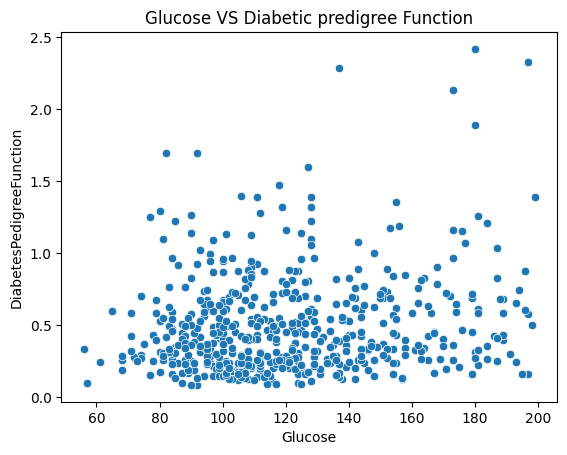

In [ ]:

sns.scatterplot(data=data1,x='Glucose',y='DiabetesPedigreeFunction')
plt.title("Glucose VS Diabetic predigree Function")
corr=data1['Glucose'].corr(data1['DiabetesPedigreeFunction'])
corr

#Observation
The correlation Coeffeicient is 0.13 which shows that these two features has no correlation between them

Text(0, 0.5, 'Glucose')

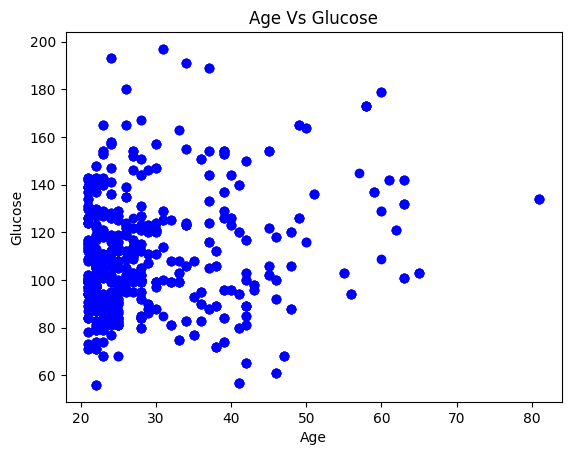

In [ ]:
plt.scatter(data1.loc[data1['Outcome'] == 0, 'Age'],
            data1.loc[data1['Outcome'] == 0, 'Glucose'],
            color='blue', label='Outcome 0')
plt.title('Age Vs Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')

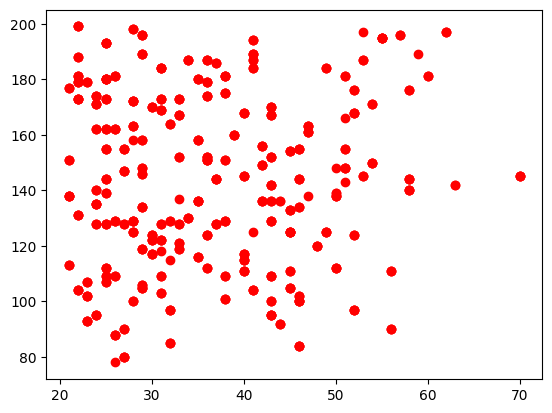

In [ ]:
plt.scatter(data1.loc[data1['Outcome'] == 1, 'Age'],
            data1.loc[data1['Outcome'] == 1, 'Glucose'],
            color='red', label='Outcome 1')

# Observation
There is no correlation Between Age and Glucose

(0.0, 80.0)

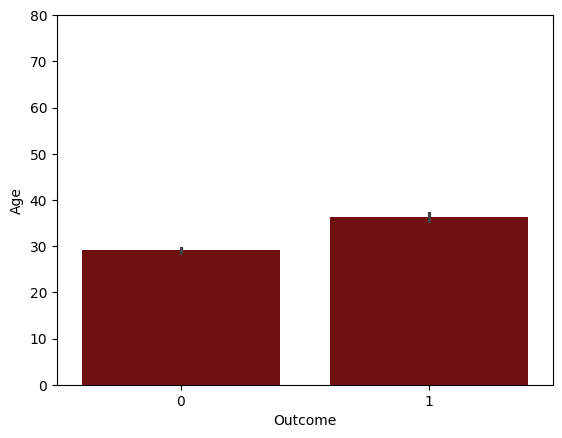

In [ ]:
p=data1.groupby('Outcome').count()
p

sns.barplot(data1,x='Outcome',y='Age',color='Maroon')
plt.ylim(0,80)


#Observation

Peoples who have age more than 30 are likely to have Diabetes

In [ ]:
f0 = data1[np.logical_and(data1['Age'] > 20, data1['Outcome'] == 1)].count()
f0



Id                          635
Pregnancies                 635
Glucose                     635
BloodPressure               635
SkinThickness               635
BMI                         635
DiabetesPedigreeFunction    635
Age                         635
Outcome                     635
dtype: int64

In [ ]:
f1=data1[np.logical_and(np.logical_and(data1['Age'] > 20, data1['Age'] < 30), data1['Outcome'] == 1)].count()
print("The No of people whose age is greater than 20 and less than 30 having diabetes",f1)
f0=data1[np.logical_and(np.logical_and(data1['Age'] > 20, data1['Age'] < 30), data1['Outcome'] == 0)].count()
print("The No of people whose age is greater than 20 and less than 30 not having diabetes",f0)
f20=data1[np.logical_and(data1['Age']>30, data1['Outcome'] == 0)].count()
print("The No of people whose age is greater than 30 having diabetes",f20)
f21=data1[np.logical_and(data1['Age']>30, data1['Outcome'] == 1)].count()
print("The No of people whose age is greater than 30 having diabetes",f21)

The No of people whose age is greater than 20 and less than 30 having diabetes Id                          175
Pregnancies                 175
Glucose                     175
BloodPressure               175
SkinThickness               175
BMI                         175
DiabetesPedigreeFunction    175
Age                         175
Outcome                     175
dtype: int64
The No of people whose age is greater than 20 and less than 30 not having diabetes Id                          700
Pregnancies                 700
Glucose                     700
BloodPressure               700
SkinThickness               700
BMI                         700
DiabetesPedigreeFunction    700
Age                         700
Outcome                     700
dtype: int64
The No of people whose age is greater than 30 having diabetes Id                          233
Pregnancies                 233
Glucose                     233
BloodPressure               233
SkinThickness               233
BMI           

In [ ]:
f1=data1[np.logical_and(np.logical_and(data1['Age'] > 20, data1['Age'] < 30), data1['Outcome'] == 1)]
f1.count()

Id                          175
Pregnancies                 175
Glucose                     175
BloodPressure               175
SkinThickness               175
BMI                         175
DiabetesPedigreeFunction    175
Age                         175
Outcome                     175
dtype: int64

In [ ]:
data1.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
count,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000
mean,1388.351449,3.444617,121.127329,71.654244,29.230849,33.052381,0.500611,31.501035
std,796.438109,3.277521,30.852489,12.221142,10.451958,6.932196,0.336875,10.626589
min,1.000000,0.000000,56.000000,24.000000,7.000000,18.200000,0.085000,21.000000
25%,701.750000,1.000000,99.000000,64.000000,22.000000,28.000000,0.259000,23.000000
50%,1386.500000,2.000000,116.000000,72.000000,29.000000,32.900000,0.416000,28.000000
75%,2077.500000,5.000000,141.250000,80.000000,36.000000,37.100000,0.654000,38.000000
max,2768.000000,17.000000,199.000000,110.000000,99.000000,67.100000,2.420000,81.000000


In [ ]:
data1.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
3,4,1,89.0,66.0,23.0,28.1,0.167,21,0
4,5,0,137.0,40.0,35.0,43.1,2.288,33,1
6,7,3,78.0,50.0,32.0,31.0,0.248,26,1
8,9,2,197.0,70.0,45.0,30.5,0.158,53,1
13,14,1,189.0,60.0,23.0,30.1,0.398,59,1


<Axes: xlabel='SkinThickness', ylabel='BMI'>

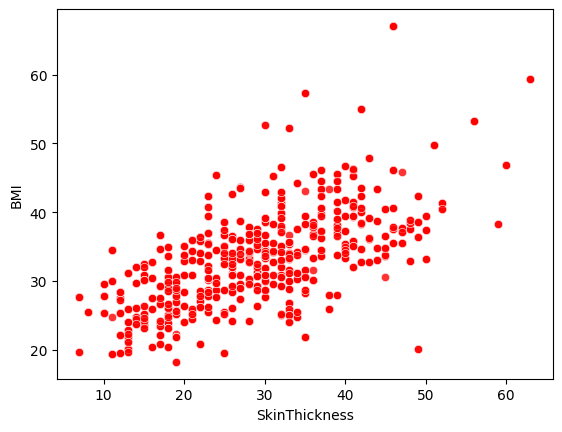

In [ ]:
sns.scatterplot(data1,x='SkinThickness',y='BMI',color='Red',alpha=0.8)

# Observation
There is a Correlation between Skin Thickness and BMI.